## 1.2 data using open cv

In [1]:
import os
import time
import cv2
import uuid

In [2]:
images_path = os.path.join('data','images')
num_images = 30

## Annotate image with label me

In [3]:
 # !labelme

## 2. Review dataset build image loading funtion

In [4]:
import tensorflow as tf
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt

## 2.1 limit GPU memory growth

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

## 2.3 Load Image into TF Data Pipeline

In [13]:
images =  tf.data.Dataset.list_files('data\\train\\images\\*.jpg',shuffle=False)

In [14]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img
    

In [15]:
images = images.map(load_image)

In [16]:
images.as_numpy_iterator().next()

array([[[226, 236, 228],
        [226, 236, 228],
        [229, 233, 232],
        ...,
        [245, 247, 233],
        [244, 248, 234],
        [244, 248, 234]],

       [[224, 234, 226],
        [227, 234, 227],
        [228, 233, 229],
        ...,
        [246, 248, 234],
        [245, 249, 235],
        [245, 249, 235]],

       [[223, 230, 222],
        [223, 230, 222],
        [225, 230, 224],
        ...,
        [246, 248, 234],
        [245, 249, 235],
        [246, 250, 236]],

       ...,

       [[173, 175, 161],
        [173, 175, 161],
        [173, 176, 159],
        ...,
        [ 67,  97,  97],
        [ 66,  96,  96],
        [ 67,  97,  95]],

       [[172, 175, 158],
        [173, 176, 159],
        [174, 175, 159],
        ...,
        [ 70,  99,  97],
        [ 73, 103, 101],
        [ 75, 106, 101]],

       [[173, 176, 159],
        [173, 176, 159],
        [174, 175, 159],
        ...,
        [ 80, 109, 107],
        [ 85, 116, 111],
        [ 83, 114, 109]]

In [17]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

## view raw images 

In [18]:
image_generator = images.batch(4).as_numpy_iterator()

In [19]:
plot_images = image_generator.next()

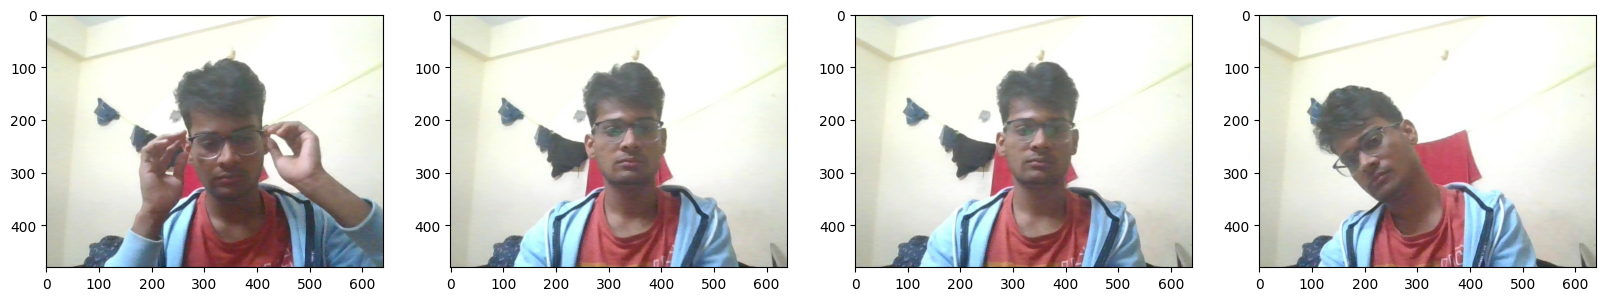

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

## partition unaugmented data 

## 3.1 train test split

## 3.2 move the matching labels


## 4 apply augmentation using albumentations

## 4.1 setup albumentations

In [21]:
import albumentations as alb

In [22]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))